# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
train_anger = pd.read_csv('%s/%s' %(directory1,paths1[0]), delimiter='\t',header=None)
train_anger.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
train_anger.columns = ['SentID', 'Tweet', 'Emotion', 'Rating']
train_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [5]:
train_fear = pd.read_csv('%s/%s' %(directory1,paths1[1]), delimiter='\t',header=None)
train_fear.columns = train_anger.columns

train_joy = pd.read_csv('%s/%s' %(directory1,paths1[2]), delimiter='\t',header=None) 
train_joy.columns = train_anger.columns

train_sadness = pd.read_csv('%s/%s' %(directory1,paths1[3]), delimiter='\t',header=None) 
train_sadness.columns = train_anger.columns

In [6]:
# check if there are any duplicates(subset = all of the columns)

assert train_fear.duplicated().sum() == 0
assert train_anger.duplicated().sum() == 0
assert train_joy.duplicated().sum() == 0
assert train_sadness.duplicated().sum() == 0

In [7]:
# checking missing data & len(train),len(test)
print(train_anger.info(), train_fear.info(), train_joy.info(), train_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   857 non-null    int64  
 1   Tweet    857 non-null    object 
 2   Emotion  857 non-null    object 
 3   Rating   857 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   1147 non-null   int64  
 1   Tweet    1147 non-null   object 
 2   Emotion  1147 non-null   object 
 3   Rating   1147 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   823 non-null  

In [8]:
print(train_anger.describe(), "\n", train_fear.describe(), "\n", train_joy.describe(), "\n", train_sadness.describe() )

             SentID      Rating
count    857.000000  857.000000
mean   10428.000000    0.496475
std      247.538886    0.169169
min    10000.000000    0.067000
25%    10214.000000    0.375000
50%    10428.000000    0.479000
75%    10642.000000    0.604000
max    10856.000000    0.938000 
              SentID       Rating
count   1147.000000  1147.000000
mean   20573.000000     0.495579
std      331.254686     0.194792
min    20000.000000     0.062000
25%    20286.500000     0.354000
50%    20573.000000     0.479000
75%    20859.500000     0.625000
max    21146.000000     0.979000 
             SentID      Rating
count    823.00000  823.000000
mean   30411.00000    0.492618
std      237.72393    0.204334
min    30000.00000    0.019000
25%    30205.50000    0.340000
50%    30411.00000    0.480000
75%    30616.50000    0.646000
max    30822.00000    0.980000 
              SentID      Rating
count    786.000000  786.000000
mean   40392.500000    0.495957
std      227.042947    0.190841
mi

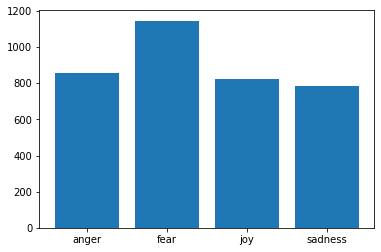

In [9]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_train = [train_anger.shape[0], train_fear.shape[0], train_joy.shape[0], train_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_train,tick_label=labels)
plt.show()

In [10]:
directory2 = 'data/dev'
paths2 = listdir(directory2)
paths2.sort()
paths2

dev_anger = pd.read_csv('%s/%s' %(directory2,paths2[0]), delimiter='\t',header=None)
dev_anger.columns = train_anger.columns
dev_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
5,10862,Sometimes I get mad over something so minuscul...,anger,0.646
6,10863,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,0.250
7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812
8,10865,@huwellwell One chosen by the CLP members! MP ...,anger,0.682
9,10866,@huwellwell One chosen by the CLP members! MP ...,anger,0.438


In [11]:
dev_fear = pd.read_csv('%s/%s' %(directory2,paths2[1]), delimiter='\t',header=None)
dev_fear.columns = train_anger.columns

dev_joy = pd.read_csv('%s/%s' %(directory2,paths2[2]), delimiter='\t',header=None) 
dev_joy.columns = train_anger.columns

dev_sadness = pd.read_csv('%s/%s' %(directory2,paths2[3]), delimiter='\t',header=None) 
dev_sadness.columns = train_anger.columns

In [12]:
# check if there are any duplicates(subset = all of the columns)

assert dev_fear.duplicated().sum() == 0
assert dev_anger.duplicated().sum() == 0
assert dev_joy.duplicated().sum() == 0
assert dev_sadness.duplicated().sum() == 0

In [13]:
# checking missing data & len(train),len(test)
print(dev_fear.info(), dev_fear.info(), dev_joy.info(), dev_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   79 non-null     int6

In [14]:
print(dev_anger.describe(), "\n", dev_fear.describe(), "\n", dev_joy.describe(), "\n", dev_sadness.describe() )

             SentID     Rating
count     84.000000  84.000000
mean   10898.500000   0.489607
std       24.392622   0.156768
min    10857.000000   0.125000
25%    10877.750000   0.410250
50%    10898.500000   0.500000
75%    10919.250000   0.590500
max    10940.000000   0.860000 
              SentID      Rating
count    110.000000  110.000000
mean   21201.500000    0.489309
std       31.898276    0.185675
min    21147.000000    0.060000
25%    21174.250000    0.354000
50%    21201.500000    0.466500
75%    21228.750000    0.632500
max    21256.000000    0.896000 
              SentID     Rating
count     79.000000  79.000000
mean   30862.000000   0.483392
std       22.949219   0.219682
min    30823.000000   0.038000
25%    30842.500000   0.312000
50%    30862.000000   0.479000
75%    30881.500000   0.653000
max    30901.000000   0.936000 
              SentID     Rating
count     74.000000  74.000000
mean   40822.500000   0.475743
std       21.505813   0.178436
min    40786.000000   0.

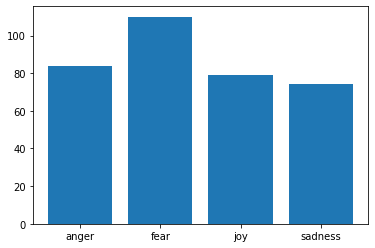

In [15]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_dev = [dev_anger.shape[0], dev_fear.shape[0], dev_joy.shape[0], dev_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_dev,tick_label=labels)
plt.show()

In [16]:
directory3 = 'data/test'
paths3 = listdir(directory3)
paths3.sort()
paths3

test_anger = pd.read_csv('%s/%s' %(directory3,paths3[0]), delimiter='\t',header=None)
test_anger.columns = train_anger.columns

test_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


In [17]:
test_fear = pd.read_csv('%s/%s' %(directory3,paths3[1]), delimiter='\t',header=None)
test_fear.columns = train_anger.columns

test_joy = pd.read_csv('%s/%s' %(directory3,paths3[2]), delimiter='\t',header=None) 
test_joy.columns = train_anger.columns

test_sadness = pd.read_csv('%s/%s' %(directory3,paths3[3]), delimiter='\t',header=None) 
test_sadness.columns = train_anger.columns

In [18]:
# check if there are any duplicates(subset = all of the columns)

assert test_fear.duplicated().sum() == 0
assert test_anger.duplicated().sum() == 0
assert test_joy.duplicated().sum() == 0
assert test_sadness.duplicated().sum() == 0

In [19]:
# checking missing data & len(train),len(test)
print(test_anger.info(), test_fear.info(), test_joy.info(), test_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   760 non-null    int64  
 1   Tweet    760 non-null    object 
 2   Emotion  760 non-null    object 
 3   Rating   760 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   995 non-null    int64  
 1   Tweet    995 non-null    object 
 2   Emotion  995 non-null    object 
 3   Rating   995 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   714 non-null    

In [20]:
print(test_anger.describe(), "\n", test_fear.describe(), "\n", test_joy.describe(), "\n", test_sadness.describe() )

             SentID      Rating
count    760.000000  760.000000
mean   11320.500000    0.502149
std      219.537392    0.171886
min    10941.000000    0.032000
25%    11130.750000    0.375000
50%    11320.500000    0.496000
75%    11510.250000    0.625000
max    11700.000000    0.976000 
             SentID     Rating
count    995.00000  995.00000
mean   21754.00000    0.50247
std      287.37606    0.20094
min    21257.00000    0.06200
25%    21505.50000    0.35400
50%    21754.00000    0.50000
75%    22002.50000    0.64600
max    22251.00000    1.00000 
              SentID      Rating
count    714.000000  714.000000
mean   31258.500000    0.508958
std      206.258333    0.217295
min    30902.000000    0.000000
25%    31080.250000    0.340000
50%    31258.500000    0.500000
75%    31436.750000    0.673000
max    31615.000000    0.980000 
             SentID      Rating
count    673.00000  673.000000
mean   41196.00000    0.511272
std      194.42265    0.202737
min    40860.00000    0.

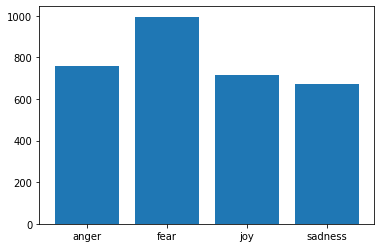

In [21]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_test = [test_anger.shape[0], test_fear.shape[0], test_joy.shape[0], test_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_test,tick_label=labels)
plt.show()

In [22]:
# show the number of instances in the Tweet Emotion Intensity dataset.

Table_1 = pd.DataFrame(np.array([(d_train), (d_dev), (d_test)])).T
Table_1.columns = ['Train', 'Dev.', 'Test']
Table_1.index = ['anger', 'fear', 'joy', 'sadness']
Table_1['All'] = Table_1.apply(lambda x: x.sum(), axis=1)
Table_1.loc['All'] = Table_1.apply(lambda x: x.sum())

Table_1

,Train,Dev.,Test,All
anger,857,84,760,1701
fear,1147,110,995,2252
joy,823,79,714,1616
sadness,786,74,673,1533
All,3613,347,3142,7102


# (2) Define Text Data Cleaning Process

In [23]:
import string
import re

from nltk.corpus import stopwords

import wordsegment as ws # $ pip install wordsegment    
ws.load()     

import emoji  # $ pip install emoji

# As the glove model contains many words made with grammatical role, tense ,or derivational morphology,
# we do not need WordNetLemmatizer or SnowballStemmer here.

In [24]:
def normalize_text(text):
     # replace emoji to word
    text = emoji.demojize(text)
    
    # remove characters outside the ascii code 128
    text = ''.join([w if ord(w)<128 else ' ' for w in text])
    
    # replace '--' with a space
    text = text.replace('--',' ')
    
    # remove any newline characters
    text = text.replace('\n',' ')
    
    # tweets mentions user using '@' followed by username. Replace all those with <user> to be usable for Glove
    text = re.sub('@[^ ]+','<user>',text)
    
    # Replace all URLs with <url> to be usable for Glove
    text = re.sub(r'\d+','<number>',text)
   
    # Replace all numbers with <number> to be usable for Glove
    text = re.sub(r'http\S+','<url>',text)
    
    # turn some abbreviations into a whold word
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"fu\*k", " fuck", text)
    text = re.sub(r"f\*c+", "fuck", text)
    text = text.replace("wtf", "what the fuck")
    
    # prepare spaces between punctuation and words
    text1 = text.split('...')
    for i in range(len(text1)):
        text1[i] = text1[i].replace('/',' / ').replace('\\',' \ ').replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace("'"," ' ").replace(':',' : ').replace(';',' ; ').replace('-',' - ').replace('(',' ( ').replace(')',' ) ').replace('[',' [ ').replace(']',' ] ').replace('&',' & ').replace('*',' * ').replace('{',' { ').replace('}',' } ').replace('-',' - ').replace('`',' ` ').replace('"',' " ').replace('>','> ').replace('<',' <')
    text1 = ' '.join(text1)
    
    # split into tokens by white space
    tokens = text1.split()
    
    return tokens

def clean_text(text):
   
    tokens = normalize_text(text)
    
    new_tokens1 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        else:
            # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
            re_punc = re.compile('[%s]' %re.escape(string.punctuation))
            # remove punctuation from each word
            w = re_punc.sub('', w)
    
            # remove remaining tokens that are not alphabetic
            if w.isalpha():
                w = w
        new_tokens1.append(w) 
        
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in new_tokens1 if not w in stop_words]
    
    new_tokens2 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        else:
            # word segment will convert the hashtag based joined words, for example, it will segment #iamthebest to ['i','am','the','best']
            w = ' '.join(ws.segment(w)) 
        new_tokens2.append(w)
        
    
    # make lower case
    tokens = [word.lower() for word in new_tokens2]
    
    
    clean_text = ' '.join(tokens)
    tokens = clean_text.split()
    
   # filter out short tokens

    tokens = [word for word in tokens if len(word) > 1]
    
    return ' '.join(tokens)

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Lexicon Feature Vectors

In [25]:
import numpy as np

In [26]:
with open('files/lexicons/NRC-Emotion-Intensity-Lexicon-v1.txt','r') as r:
    lines = r.readlines()
# open file
with open("files/lexicons/Lexicon.txt", "w") as w:
    for l in lines:
        emotion = l.split()[1]
        if 'anger' == emotion or 'joy' == emotion or 'fear' == emotion or 'sadness' == emotion:
            w.write(l)

In [27]:
def loadLexiconModel(LexiconFile):
    print("Loading Lexicon Model")
    f = open(LexiconFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[2:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [28]:
# To download the lexicon model: http://saifmohammad.com/WebPages/lexicons.html  
# choose 1b. NRC Emotion Intensity Lexicon (aka Affect Intensity Lexicon), created using Best-Worst Scaling.


word_vector_path = "files/lexicons/"
model_path = word_vector_path + "Lexicon.txt"

model_le = loadLexiconModel(model_path)


Loading Lexicon Model
Done. Found 4192 word vectors.  words loaded!


In [29]:
# do a sanity check
print(model_le['fury'])

[0.406]


# (2) Load Glove Feature Vectors

In [30]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[1:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [31]:
# To download the pretrained glove model (2B tweets, 27B tokens) - [https://nlp.stanford.edu/projects/glove/   glove.twitter.27B.zip]
# choose glove.twitter.27B.100d.txt from glove.twitter.27B.zip. [100-dimension vectors]

word_vector_path = "files/wv_models/"
wv_model_path = word_vector_path + "glove.twitter.27B.100d.txt"

wv_model_g = loadGloveModel(wv_model_path)

Loading Glove Model
Done. Found 1193514 word vectors.  words loaded!


# (3) Extract Feature with Glove

# 1) Clean Text Data

In [32]:
train_anger['Tweet'] = train_anger['Tweet'].apply(clean_text)
train_fear['Tweet'] = train_fear['Tweet'].apply(clean_text)
train_joy['Tweet'] = train_joy['Tweet'].apply(clean_text)
train_sadness['Tweet'] = train_sadness['Tweet'].apply(clean_text)

dev_anger['Tweet'] = dev_anger['Tweet'].apply(clean_text)
dev_fear['Tweet'] = dev_fear['Tweet'].apply(clean_text)
dev_joy['Tweet'] = dev_joy['Tweet'].apply(clean_text)
dev_sadness['Tweet'] = dev_sadness['Tweet'].apply(clean_text)

test_anger['Tweet'] = test_anger['Tweet'].apply(clean_text)
test_fear['Tweet'] = test_fear['Tweet'].apply(clean_text)
test_joy['Tweet'] = test_joy['Tweet'].apply(clean_text)
test_sadness['Tweet'] = test_sadness['Tweet'].apply(clean_text)

In [33]:
# do a sanity check
train_anger[0:55]

,SentID,Tweet,Emotion,Rating
0,10000,how fuck who heck moved fridge knock landlord ...,anger,0.938
1,10001,so indian uber driver called someone word if m...,anger,0.896
2,10002,<user> asked parcel delivered pick store addre...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
5,10005,my blood boiling,anger,0.875
6,10006,when still got whole season wentworth watch st...,anger,0.875
7,10007,<user> tracking show equipment delivered why s...,anger,0.875
8,10008,<user> legit furious people fucking idiots,anger,0.875
9,10009,how suppose work wtf dude thanks pissing,anger,0.875


In [34]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [35]:
show_text_len(train_fear).describe()

count    1147.000000
mean       11.174368
std         4.581159
min         2.000000
25%         8.000000
50%        11.000000
75%        15.000000
max        28.000000
Name: text_len, dtype: float64

In [36]:
show_text_len(train_joy).describe()

count    823.000000
mean      10.946537
std        4.613485
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       33.000000
Name: text_len, dtype: float64

In [37]:
show_text_len(train_sadness).describe()

count    786.000000
mean      11.170483
std        5.692005
min        1.000000
25%        7.000000
50%       11.000000
75%       14.000000
max       79.000000
Name: text_len, dtype: float64

In [38]:
show_text_len(dev_anger).describe()

count    84.000000
mean     10.500000
std       4.280806
min       2.000000
25%       6.750000
50%      11.000000
75%      13.000000
max      21.000000
Name: text_len, dtype: float64

In [39]:
show_text_len(dev_fear).describe()

count    110.000000
mean      11.345455
std        4.440093
min        2.000000
25%        8.000000
50%       11.000000
75%       14.750000
max       24.000000
Name: text_len, dtype: float64

In [40]:
show_text_len(dev_joy).describe()

count    79.000000
mean     10.468354
std       4.044101
min       2.000000
25%       8.000000
50%      10.000000
75%      14.000000
max      23.000000
Name: text_len, dtype: float64

In [41]:
show_text_len(dev_sadness).describe()

count    74.000000
mean     11.635135
std       4.838698
min       3.000000
25%       8.000000
50%      12.000000
75%      14.750000
max      30.000000
Name: text_len, dtype: float64

In [42]:
show_text_len(test_anger).describe()

count    760.000000
mean      11.240789
std        4.980454
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       43.000000
Name: text_len, dtype: float64

In [43]:
show_text_len(test_fear).describe()

count    995.000000
mean      11.056281
std        4.710839
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       38.000000
Name: text_len, dtype: float64

In [44]:
show_text_len(test_joy).describe()

count    714.000000
mean      11.145658
std        5.262380
min        2.000000
25%        7.000000
50%       11.000000
75%       14.000000
max       42.000000
Name: text_len, dtype: float64

In [45]:
show_text_len(test_sadness).describe()

count    673.000000
mean      11.087667
std        4.508891
min        2.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       27.000000
Name: text_len, dtype: float64

There is not any reviews' length = 0 after text cleaning

In [46]:
train_anger_tweets = list(train_anger['Tweet'])
train_anger_intensities = list(train_anger['Rating'])

train_fear_tweets = list(train_fear['Tweet'])
train_fear_intensities = list(train_fear['Rating'])

train_sadness_tweets = list(train_sadness['Tweet'])
train_sadness_intensities = list(train_sadness['Rating'])

train_joy_tweets = list(train_joy['Tweet'])
train_joy_intensities = list(train_joy['Rating'])

In [47]:
# check
train_anger_tweets[:100]

['how fuck who heck moved fridge knock landlord door angry mad',
 'so indian uber driver called someone word if moving vehicle would jumped disgusted',
 '<user> asked parcel delivered pick store address fuming poor customer service',
 'ef whichever butt wipe pulled fire alarm davis bc sound asleep pissed angry upset tired sad tired angry',
 'do join <user> put phone talk rude taking money acc willy nilly fuming',
 'my blood boiling',
 'when still got whole season wentworth watch stupid cunt work ruins us loudly crying face loudly crying face <user> raging old cunt',
 '<user> tracking show equipment delivered why service suddenly delayed we already <number> weeks fuming',
 '<user> legit furious people fucking idiots',
 'how suppose work wtf dude thanks pissing',
 'im mad power rangers im incensed im furious',
 'wont use using <user> <user> these guys cant get nothing right fuming',
 'bitches aggravate like inspires biggest cunt known man kind',
 'why <user> come glasgow night working fu

In [48]:
# check
train_anger_intensities[:10]

[0.938,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

In [49]:
dev_anger_tweets = list(dev_anger['Tweet'])
dev_anger_intensities = list(dev_anger['Rating'])

dev_fear_tweets = list(dev_fear['Tweet'])
dev_fear_intensities = list(dev_fear['Rating'])

dev_sadness_tweets = list(dev_sadness['Tweet'])
dev_sadness_intensities = list(dev_sadness['Rating'])

dev_joy_tweets = list(dev_joy['Tweet'])
dev_joy_intensities = list(dev_joy['Rating'])

In [50]:
test_anger_tweets = list(test_anger['Tweet'])
test_anger_intensities = list(test_anger['Rating'])

test_fear_tweets = list(test_fear['Tweet'])
test_fear_intensities = list(test_fear['Rating'])

test_sadness_tweets = list(test_sadness['Tweet'])
test_sadness_intensities = list(test_sadness['Rating'])

test_joy_tweets = list(test_joy['Tweet'])
test_joy_intensities = list(test_joy['Rating'])

In [51]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train_anger)), max(show_text_len(train_fear)), max(show_text_len(train_joy)),\
                              max(show_text_len(train_sadness)), max(show_text_len(dev_anger)), max(show_text_len(dev_fear)),\
                                  max(show_text_len(dev_joy)), max(show_text_len(dev_sadness)), max(show_text_len(test_anger)),\
                                  max(show_text_len(test_fear)), max(show_text_len(test_joy)), max(show_text_len(test_sadness))]))

all_tweets_max_len.index = ['train_anger', 'train_fear', 'train_joy', 'train_sadness', 'dev_anger', 'dev_fear', 'dev_joy', 'dev_sadness',\
                            'test_anger', 'test_fear', 'test_joy', 'test_sadness']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train_anger,77
train_fear,28
train_joy,33
train_sadness,79
dev_anger,21
dev_fear,24
dev_joy,23
dev_sadness,30
test_anger,43
test_fear,38


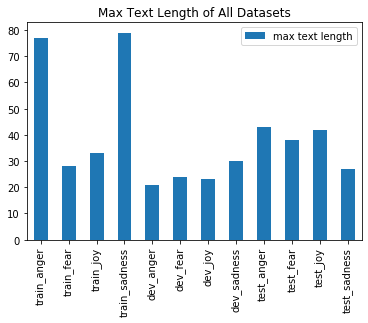

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [53]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(max(show_text_len(train_anger)), max(show_text_len(train_fear)), max(show_text_len(train_joy)),\
             max(show_text_len(train_sadness)))
max_len

79

# 2)  Prepare Sentence Vectors as Inputs

In [64]:
train_anger_tweets1 = [s.split() for s in train_anger_tweets]
train_fear_tweets1 = [s.split() for s in train_fear_tweets]
train_joy_tweets1 = [s.split() for s in train_joy_tweets]
train_sadness_tweets1 = [s.split() for s in train_sadness_tweets]

train_anger_tweets[:2]

['how fuck who heck moved fridge knock landlord door angry mad',
 'so indian uber driver called someone word if moving vehicle would jumped disgusted']

In [65]:
dev_anger_tweets1 = [s.split() for s in dev_anger_tweets]
dev_fear_tweets1 = [s.split() for s in dev_fear_tweets]
dev_joy_tweets1 = [s.split() for s in dev_joy_tweets]
dev_sadness_tweets1 = [s.split() for s in dev_sadness_tweets]

In [66]:
test_anger_tweets1 = [s.split() for s in test_anger_tweets]
test_fear_tweets1 = [s.split() for s in test_fear_tweets]
test_joy_tweets1 = [s.split() for s in test_joy_tweets]
test_sadness_tweets1 = [s.split() for s in test_sadness_tweets]

In [67]:
# Glove

In [68]:
import numpy as np
from numpy import zeros

In [69]:
# prepare glove (generate sentence vectors)

train_anger_sentence_vecs = []

for sentence in train_anger_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    train_anger_sentence_vecs.append(vector)
np.array(train_anger_sentence_vecs).shape

(857, 100)

In [70]:
train_fear_sentence_vecs = []

for sentence in train_fear_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    train_fear_sentence_vecs.append(vector)
    
#
train_joy_sentence_vecs = []

for sentence in train_joy_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    train_joy_sentence_vecs.append(vector)
    
#
train_sadness_sentence_vecs = []

for sentence in train_sadness_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    train_sadness_sentence_vecs.append(vector)

In [71]:
dev_anger_sentence_vecs = []

for sentence in dev_anger_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    dev_anger_sentence_vecs.append(vector)
    
    
dev_fear_sentence_vecs = []

for sentence in dev_fear_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    dev_fear_sentence_vecs.append(vector)
    
#
dev_joy_sentence_vecs = []

for sentence in dev_joy_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    dev_joy_sentence_vecs.append(vector)
    
#
dev_sadness_sentence_vecs = []

for sentence in dev_sadness_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    dev_sadness_sentence_vecs.append(vector)

In [72]:
test_anger_sentence_vecs = []

for sentence in test_anger_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    test_anger_sentence_vecs.append(vector)
    
    
test_fear_sentence_vecs = []

for sentence in test_fear_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    test_fear_sentence_vecs.append(vector)
    
#
test_joy_sentence_vecs = []

for sentence in test_joy_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    test_joy_sentence_vecs.append(vector)
    
#
test_sadness_sentence_vecs = []

for sentence in test_sadness_tweets1:
    vector = zeros(100)
    word_num = 0
    for word in sentence[:80]:
        if word in wv_model_g.keys():
            vector += wv_model_g.get(word)
            word_num += 1
    if word_num > 0 :
        vector = vector / word_num
    test_sadness_sentence_vecs.append(vector)

In [73]:
# Lexicons

In [75]:
train_anger_sentences = []

for sentence in train_anger_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    train_anger_sentences.append(text)

train_anger_sentences[:2]

train_anger_sentence_vectors = []
for sentence in train_anger_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    train_anger_sentence_vectors.append(sentence_vec)
print(train_anger_sentence_vectors[:2])
np.array(train_anger_sentence_vectors).shape

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.824, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.295, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


(857, 80)

In [76]:
train_fear_sentences = []

for sentence in train_fear_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    train_fear_sentences.append(text)


train_fear_sentence_vectors = []
for sentence in train_fear_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    train_fear_sentence_vectors.append(sentence_vec)
    
    
#    
train_joy_sentences = []
  
for sentence in train_joy_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    train_joy_sentences.append(text)


train_joy_sentence_vectors = []
for sentence in train_joy_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    train_joy_sentence_vectors.append(sentence_vec)
    
    
    
#
train_sadness_sentences = []

for sentence in train_sadness_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    train_sadness_sentences.append(text)

train_sadness_sentence_vectors = []
for sentence in train_sadness_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    train_sadness_sentence_vectors.append(sentence_vec)


In [77]:
dev_anger_sentences = []

for sentence in dev_anger_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    dev_anger_sentences.append(text)


dev_anger_sentence_vectors = []
for sentence in dev_anger_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    dev_anger_sentence_vectors.append(sentence_vec)
    
    
#

dev_fear_sentences = []

for sentence in dev_fear_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    dev_fear_sentences.append(text)


dev_fear_sentence_vectors = []
for sentence in dev_fear_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    dev_fear_sentence_vectors.append(sentence_vec)
    
    
#    
dev_joy_sentences = []
  
for sentence in dev_joy_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    dev_joy_sentences.append(text)


dev_joy_sentence_vectors = []
for sentence in dev_joy_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    dev_joy_sentence_vectors.append(sentence_vec)
    
    
    
#
dev_sadness_sentences = []

for sentence in dev_sadness_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    dev_sadness_sentences.append(text)

dev_sadness_sentence_vectors = []
for sentence in dev_sadness_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    dev_sadness_sentence_vectors.append(sentence_vec)
    

In [79]:
test_anger_sentences = []

for sentence in test_anger_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    test_anger_sentences.append(text)


test_anger_sentence_vectors = []
for sentence in test_anger_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    test_anger_sentence_vectors.append(sentence_vec)
    
    
#

test_fear_sentences = []

for sentence in test_fear_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    test_fear_sentences.append(text)


test_fear_sentence_vectors = []
for sentence in test_fear_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    test_fear_sentence_vectors.append(sentence_vec)
    
    
#    
test_joy_sentences = []
  
for sentence in test_joy_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    test_joy_sentences.append(text)


test_joy_sentence_vectors = []
for sentence in test_joy_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    test_joy_sentence_vectors.append(sentence_vec)
    
    
    
#
test_sadness_sentences = []

for sentence in test_sadness_tweets1:
    text = []
    for word in sentence:
        if word in model_le.keys():
            vector = model_le.get(word)[0]
        else:
            vector = 0
        text.append(vector)
    test_sadness_sentences.append(text)

test_sadness_sentence_vectors = []
for sentence in test_sadness_sentences:
    sentence_vec = sentence + [0] * (80 - len(sentence))
    test_sadness_sentence_vectors.append(sentence_vec)
    

In [82]:
train_anger_vecs = []
train_anger_vecs = np.concatenate((train_anger_sentence_vecs, train_anger_sentence_vectors),axis=1)
train_anger_vecs.shape

(857, 180)

In [83]:
train_fear_vecs = np.concatenate((train_fear_sentence_vecs, train_fear_sentence_vectors),axis=1)
train_joy_vecs = np.concatenate((train_joy_sentence_vecs, train_joy_sentence_vectors),axis=1)
train_sadness_vecs = np.concatenate((train_sadness_sentence_vecs, train_sadness_sentence_vectors),axis=1)

dev_anger_vecs = np.concatenate((dev_anger_sentence_vecs, dev_anger_sentence_vectors),axis=1)
dev_fear_vecs = np.concatenate((dev_fear_sentence_vecs, dev_fear_sentence_vectors),axis=1)
dev_joy_vecs = np.concatenate((dev_joy_sentence_vecs, dev_joy_sentence_vectors),axis=1)
dev_sadness_vecs = np.concatenate((dev_sadness_sentence_vecs, dev_sadness_sentence_vectors),axis=1)

test_anger_vecs = np.concatenate((test_anger_sentence_vecs, test_anger_sentence_vectors),axis=1)
test_fear_vecs = np.concatenate((test_fear_sentence_vecs, test_fear_sentence_vectors),axis=1)
test_joy_vecs = np.concatenate((test_joy_sentence_vecs, test_joy_sentence_vectors),axis=1)
test_sadness_vecs = np.concatenate((test_sadness_sentence_vecs, test_sadness_sentence_vectors),axis=1)



 # 4)  Save Train Vectors & Dev. Vectors & Test Vectors

In [84]:
np.save('files/train_vectors/train_anger_vecs2.npy',train_anger_vecs)
np.save('files/train_vectors/train_fear_vecs2.npy',train_fear_vecs)
np.save('files/train_vectors/train_sadness_vecs2.npy',train_sadness_vecs)
np.save('files/train_vectors/train_joy_vecs2.npy',train_joy_vecs)

print('Train Vectors Saved')

Train Vectors Saved


In [85]:
np.save('files/dev_vectors/dev_anger_vecs2.npy',dev_anger_vecs)
np.save('files/dev_vectors/dev_fear_vecs2.npy',dev_fear_vecs)
np.save('files/dev_vectors/dev_sadness_vecs2.npy',dev_sadness_vecs)
np.save('files/dev_vectors/dev_joy_vecs2.npy',dev_joy_vecs)

print('Dev Vectors Saved')

Dev Vectors Saved


In [86]:
np.save('files/test_vectors/test_anger_vecs2.npy',test_anger_vecs)
np.save('files/test_vectors/test_fear_vecs2.npy',test_fear_vecs)
np.save('files/test_vectors/test_sadness_vecs2.npy',test_sadness_vecs)
np.save('files/test_vectors/test_joy_vecs2.npy',test_joy_vecs)

print('Test Vectors Saved')

Test Vectors Saved


np.save('files/gold_label_vectors/train/anger.npy',np.array(train_anger_intensities))
np.save('files/gold_label_vectors/train/fear.npy',np.array(train_fear_intensities))
np.save('files/gold_label_vectors/train/joy.npy',np.array(train_joy_intensities))
np.save('files/gold_label_vectors/train/sadness.npy',np.array(train_sadness_intensities))        

print('Train Intensities Saved')


np.save('files/gold_label_vectors/dev/anger.npy',np.array(dev_anger_intensities))
np.save('files/gold_label_vectors/dev/fear.npy',np.array(dev_fear_intensities))
np.save('files/gold_label_vectors/dev/joy.npy',np.array(dev_joy_intensities))
np.save('files/gold_label_vectors/dev/sadness.npy',np.array(dev_sadness_intensities))        

print('Dev Intensities Saved')


np.save('files/gold_label_vectors/test/anger.npy',np.array(test_anger_intensities))
np.save('files/gold_label_vectors/test/fear.npy',np.array(test_fear_intensities))
np.save('files/gold_label_vectors/test/joy.npy',np.array(test_joy_intensities))
np.save('files/gold_label_vectors/test/sadness.npy',np.array(test_sadness_intensities))        

print('Test Intensities Saved')